# Problem Statement

# Task 1:-Prepare a complete data analysis report on the given data.
# Task 2:-Create a predictive model which will help the bank to identify which customer will make transactions in future.

# Identify which customers will make a specific transaction in the future, irrespective of the amount of money transacted. 

# Note: You can skip EDA part in this project as feature names are not provided.

# Importing Libraries:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Loading Dataset:

In [2]:
df=pd.read_csv('train(1).csv')

In [3]:
df

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,train_199995,0,11.4880,-0.4956,8.2622,3.5142,10.3404,11.6081,5.6709,15.1516,...,6.1415,13.2305,3.9901,0.9388,18.0249,-1.7939,2.1661,8.5326,16.6660,-17.8661
199996,train_199996,0,4.9149,-2.4484,16.7052,6.6345,8.3096,-10.5628,5.8802,21.5940,...,4.9611,4.6549,0.6998,1.8341,22.2717,1.7337,-2.1651,6.7419,15.9054,0.3388
199997,train_199997,0,11.2232,-5.0518,10.5127,5.6456,9.3410,-5.4086,4.5555,21.5571,...,4.0651,5.4414,3.1032,4.8793,23.5311,-1.5736,1.2832,8.7155,13.8329,4.1995
199998,train_199998,0,9.7148,-8.6098,13.6104,5.7930,12.5173,0.5339,6.0479,17.0152,...,2.6840,8.6587,2.7337,11.1178,20.4158,-0.0786,6.7980,10.0342,15.5289,-13.9001


# Basic Checks:

In [4]:
df.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [5]:
df.tail()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
199995,train_199995,0,11.4880,-0.4956,8.2622,3.5142,10.3404,11.6081,5.6709,15.1516,...,6.1415,13.2305,3.9901,0.9388,18.0249,-1.7939,2.1661,8.5326,16.6660,-17.8661
199996,train_199996,0,4.9149,-2.4484,16.7052,6.6345,8.3096,-10.5628,5.8802,21.5940,...,4.9611,4.6549,0.6998,1.8341,22.2717,1.7337,-2.1651,6.7419,15.9054,0.3388
199997,train_199997,0,11.2232,-5.0518,10.5127,5.6456,9.3410,-5.4086,4.5555,21.5571,...,4.0651,5.4414,3.1032,4.8793,23.5311,-1.5736,1.2832,8.7155,13.8329,4.1995
199998,train_199998,0,9.7148,-8.6098,13.6104,5.7930,12.5173,0.5339,6.0479,17.0152,...,2.6840,8.6587,2.7337,11.1178,20.4158,-0.0786,6.7980,10.0342,15.5289,-13.9001
199999,train_199999,0,10.8762,-5.7105,12.1183,8.0328,11.5577,0.3488,5.2839,15.2058,...,8.9842,1.6893,0.1276,0.3766,15.2101,-2.4907,-2.2342,8.1857,12.1284,0.1385


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 202 entries, ID_code to var_199
dtypes: float64(200), int64(1), object(1)
memory usage: 308.2+ MB


In [7]:
df.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,...,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,0.300653,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,...,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
25%,0.000000,8.453850,-4.740025,8.722475,5.254075,9.883175,-11.200350,4.767700,13.943800,-2.317800,...,-0.058825,5.157400,0.889775,0.584600,15.629800,-1.170700,-1.946925,8.252800,13.829700,-11.208475
50%,0.000000,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,0.393700,...,3.203600,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550
75%,0.000000,12.758200,1.358625,12.516700,8.324100,12.261125,0.924800,6.003000,19.102900,2.937900,...,6.406200,9.512525,2.949500,6.205800,20.396525,0.829600,6.556725,9.593300,18.064725,4.836800
max,1.000000,20.315000,10.376800,19.353000,13.188300,16.671400,17.251600,8.447700,27.691800,10.151300,...,18.440900,16.716500,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,28.500700


In [8]:
pd.set_option('display.max_columns', None)

In [9]:
df

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,5.7470,2.9252,3.1821,14.0137,0.5745,8.7989,14.5691,5.7487,-7.2393,4.2840,30.7133,10.5350,16.2191,2.5791,2.4716,14.3831,13.4325,-5.1488,-0.4073,4.9306,5.9965,-0.3085,12.9041,-3.8766,16.8911,11.1920,10.5785,0.6764,7.8871,4.6667,3.8743,-5.2387,7.3746,11.5767,12.0446,11.6418,-7.0170,5.9226,-14.2136,16.0283,5.3253,12.9194,29.0460,-0.6940,5.1736,-0.7474,14.8322,11.2668,5.3822,2.0183,10.1166,16.1828,4.9590,2.0771,-0.2154,8.6748,9.5319,5.8056,22.4321,5.0109,-4.7010,21.6374,0.5663,5.1999,8.8600,43.1127,18.3816,-2.3440,23.4104,6.5199,12.1983,13.6468,13.8372,1.3675,2.9423,-4.5213,21.4669,9.3225,16.4597,7.9984,-1.7069,-21.4494,6.7806,11.0924,9.9913,14.8421,0.1812,8.9642,16.2572,2.1743,-3.4132,9.4763,13.3102,26.5376,1.4403,14.7100,6.0454,9.5426,17.1554,14.1104,24.3627,2.0323,6.7602,3.9141,-0.4851,2.5240,1.5093,2.5516,15.5752,-13.4221,7.2739,16.0094,9.7268,0.8897,0.7754,4.2218,12.0039,13.8571,-0.7338,-1.9245,15.4462,12.8287,0.3587,9.6508,6.5674,5.1726,3.1345,29.4547,31.4045,2.8279,15.6599,8.3307,-5.6011,19.0614,11.2663,8.6989,8.3694,11.5659,-16.4727,4.0288,17.9244,18.5177,10.7800,9.0056,16.6964,10.4838,1.6573,12.1749,-13.1324,17.6054,11.5423,15.4576,5.3133,3.6159,5.0384,6.6760,12.6644,2.7004,-0.6975,9.5981,5.4879,-4.7645,-8.4254,20.8773,3.1531,18.5618,7.7423,-10.1245,13.7241,-3.5189,1.7202,-8.4051,9.0164,3.0657,14.3691,25.8398,5.8764,11.8411,-19.7159,17.5743,0.5857,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,8.0851,-0.4032,8.0585,14.0239,8.4135,5.4345,13.7003,13.8275,-15.5849,7.8000,28.5708,3.4287,2.7407,8.5524,3.3716,6.9779,13.8910,-11.7684,-2.5586,5.0464,0.5481,-9.2987,7.8755,1.2859,19.3710,11.3702,0.7399,2.7995,5.8434,10.8160,3.6783,-11.1147,1.8730,9.8775,11.7842,1.2444,-47.3797,7.3718,0.1948,34.4014,25.7037,11.8343,13.2256,-4.1083,6.6885,-8.0946,18.5995,19.3219,7.0118,1.9210,8.8682,8.0109,-7.2417,1.7944,-1.3147,8.1042,1.5365,5.4007,7.9344,5.0220,2.2302,40.5632,0.5134,3.1701,20.1068,7.7841,7.0529,3.2709,23.4822,5.5075,13.7814,2.5462,18.1782,0.3683,-4.8210,-5.4850,13.7867,-13.5901,11.0993,7.9022,12.2301,0.4768,6.8852,8.0905,10.9631,11.7569,-1.2722,24.7876,26.6881,1.8944,0.6939,-13.6950,8.4068,35.4734,1.7093,15.1866,2.6227,7.3412,32.0888,13.9550,13.0858,6.6203,7.1051,5.3523,8.5426,3.6159,4.1569,3.0454,7.8522,-11.5100,7.5109,31.5899,9.5018,8.2736,10.1633,0.1225,12.5942,14.5697

In [10]:
df.isnull().sum()

ID_code    0
target     0
var_0      0
var_1      0
var_2      0
          ..
var_195    0
var_196    0
var_197    0
var_198    0
var_199    0
Length: 202, dtype: int64

There are no null values present in the dataset.

In [11]:
df.duplicated().sum()

0

There are no duplicated values present in this data.

# This data has 200000 rows and 202 columns without a Specific column names and also mentioned as we can skip EDA part in this project as feature names are not provided, because of this Skipping the EDA Part and the Domain Analysis part because these parts cannot be performed without the Feature names.

# Data Preprocessing:

In [12]:
df

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,5.7470,2.9252,3.1821,14.0137,0.5745,8.7989,14.5691,5.7487,-7.2393,4.2840,30.7133,10.5350,16.2191,2.5791,2.4716,14.3831,13.4325,-5.1488,-0.4073,4.9306,5.9965,-0.3085,12.9041,-3.8766,16.8911,11.1920,10.5785,0.6764,7.8871,4.6667,3.8743,-5.2387,7.3746,11.5767,12.0446,11.6418,-7.0170,5.9226,-14.2136,16.0283,5.3253,12.9194,29.0460,-0.6940,5.1736,-0.7474,14.8322,11.2668,5.3822,2.0183,10.1166,16.1828,4.9590,2.0771,-0.2154,8.6748,9.5319,5.8056,22.4321,5.0109,-4.7010,21.6374,0.5663,5.1999,8.8600,43.1127,18.3816,-2.3440,23.4104,6.5199,12.1983,13.6468,13.8372,1.3675,2.9423,-4.5213,21.4669,9.3225,16.4597,7.9984,-1.7069,-21.4494,6.7806,11.0924,9.9913,14.8421,0.1812,8.9642,16.2572,2.1743,-3.4132,9.4763,13.3102,26.5376,1.4403,14.7100,6.0454,9.5426,17.1554,14.1104,24.3627,2.0323,6.7602,3.9141,-0.4851,2.5240,1.5093,2.5516,15.5752,-13.4221,7.2739,16.0094,9.7268,0.8897,0.7754,4.2218,12.0039,13.8571,-0.7338,-1.9245,15.4462,12.8287,0.3587,9.6508,6.5674,5.1726,3.1345,29.4547,31.4045,2.8279,15.6599,8.3307,-5.6011,19.0614,11.2663,8.6989,8.3694,11.5659,-16.4727,4.0288,17.9244,18.5177,10.7800,9.0056,16.6964,10.4838,1.6573,12.1749,-13.1324,17.6054,11.5423,15.4576,5.3133,3.6159,5.0384,6.6760,12.6644,2.7004,-0.6975,9.5981,5.4879,-4.7645,-8.4254,20.8773,3.1531,18.5618,7.7423,-10.1245,13.7241,-3.5189,1.7202,-8.4051,9.0164,3.0657,14.3691,25.8398,5.8764,11.8411,-19.7159,17.5743,0.5857,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,8.0851,-0.4032,8.0585,14.0239,8.4135,5.4345,13.7003,13.8275,-15.5849,7.8000,28.5708,3.4287,2.7407,8.5524,3.3716,6.9779,13.8910,-11.7684,-2.5586,5.0464,0.5481,-9.2987,7.8755,1.2859,19.3710,11.3702,0.7399,2.7995,5.8434,10.8160,3.6783,-11.1147,1.8730,9.8775,11.7842,1.2444,-47.3797,7.3718,0.1948,34.4014,25.7037,11.8343,13.2256,-4.1083,6.6885,-8.0946,18.5995,19.3219,7.0118,1.9210,8.8682,8.0109,-7.2417,1.7944,-1.3147,8.1042,1.5365,5.4007,7.9344,5.0220,2.2302,40.5632,0.5134,3.1701,20.1068,7.7841,7.0529,3.2709,23.4822,5.5075,13.7814,2.5462,18.1782,0.3683,-4.8210,-5.4850,13.7867,-13.5901,11.0993,7.9022,12.2301,0.4768,6.8852,8.0905,10.9631,11.7569,-1.2722,24.7876,26.6881,1.8944,0.6939,-13.6950,8.4068,35.4734,1.7093,15.1866,2.6227,7.3412,32.0888,13.9550,13.0858,6.6203,7.1051,5.3523,8.5426,3.6159,4.1569,3.0454,7.8522,-11.5100,7.5109,31.5899,9.5018,8.2736,10.1633,0.1225,12.5942,14.5697

In [13]:
df1=df.copy()

In [14]:
df1

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,5.7470,2.9252,3.1821,14.0137,0.5745,8.7989,14.5691,5.7487,-7.2393,4.2840,30.7133,10.5350,16.2191,2.5791,2.4716,14.3831,13.4325,-5.1488,-0.4073,4.9306,5.9965,-0.3085,12.9041,-3.8766,16.8911,11.1920,10.5785,0.6764,7.8871,4.6667,3.8743,-5.2387,7.3746,11.5767,12.0446,11.6418,-7.0170,5.9226,-14.2136,16.0283,5.3253,12.9194,29.0460,-0.6940,5.1736,-0.7474,14.8322,11.2668,5.3822,2.0183,10.1166,16.1828,4.9590,2.0771,-0.2154,8.6748,9.5319,5.8056,22.4321,5.0109,-4.7010,21.6374,0.5663,5.1999,8.8600,43.1127,18.3816,-2.3440,23.4104,6.5199,12.1983,13.6468,13.8372,1.3675,2.9423,-4.5213,21.4669,9.3225,16.4597,7.9984,-1.7069,-21.4494,6.7806,11.0924,9.9913,14.8421,0.1812,8.9642,16.2572,2.1743,-3.4132,9.4763,13.3102,26.5376,1.4403,14.7100,6.0454,9.5426,17.1554,14.1104,24.3627,2.0323,6.7602,3.9141,-0.4851,2.5240,1.5093,2.5516,15.5752,-13.4221,7.2739,16.0094,9.7268,0.8897,0.7754,4.2218,12.0039,13.8571,-0.7338,-1.9245,15.4462,12.8287,0.3587,9.6508,6.5674,5.1726,3.1345,29.4547,31.4045,2.8279,15.6599,8.3307,-5.6011,19.0614,11.2663,8.6989,8.3694,11.5659,-16.4727,4.0288,17.9244,18.5177,10.7800,9.0056,16.6964,10.4838,1.6573,12.1749,-13.1324,17.6054,11.5423,15.4576,5.3133,3.6159,5.0384,6.6760,12.6644,2.7004,-0.6975,9.5981,5.4879,-4.7645,-8.4254,20.8773,3.1531,18.5618,7.7423,-10.1245,13.7241,-3.5189,1.7202,-8.4051,9.0164,3.0657,14.3691,25.8398,5.8764,11.8411,-19.7159,17.5743,0.5857,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,8.0851,-0.4032,8.0585,14.0239,8.4135,5.4345,13.7003,13.8275,-15.5849,7.8000,28.5708,3.4287,2.7407,8.5524,3.3716,6.9779,13.8910,-11.7684,-2.5586,5.0464,0.5481,-9.2987,7.8755,1.2859,19.3710,11.3702,0.7399,2.7995,5.8434,10.8160,3.6783,-11.1147,1.8730,9.8775,11.7842,1.2444,-47.3797,7.3718,0.1948,34.4014,25.7037,11.8343,13.2256,-4.1083,6.6885,-8.0946,18.5995,19.3219,7.0118,1.9210,8.8682,8.0109,-7.2417,1.7944,-1.3147,8.1042,1.5365,5.4007,7.9344,5.0220,2.2302,40.5632,0.5134,3.1701,20.1068,7.7841,7.0529,3.2709,23.4822,5.5075,13.7814,2.5462,18.1782,0.3683,-4.8210,-5.4850,13.7867,-13.5901,11.0993,7.9022,12.2301,0.4768,6.8852,8.0905,10.9631,11.7569,-1.2722,24.7876,26.6881,1.8944,0.6939,-13.6950,8.4068,35.4734,1.7093,15.1866,2.6227,7.3412,32.0888,13.9550,13.0858,6.6203,7.1051,5.3523,8.5426,3.6159,4.1569,3.0454,7.8522,-11.5100,7.5109,31.5899,9.5018,8.2736,10.1633,0.1225,12.5942,14.5697

In [15]:
df1.drop('ID_code',inplace=True,axis=1)

In [16]:
df1

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,5.7470,2.9252,3.1821,14.0137,0.5745,8.7989,14.5691,5.7487,-7.2393,4.2840,30.7133,10.5350,16.2191,2.5791,2.4716,14.3831,13.4325,-5.1488,-0.4073,4.9306,5.9965,-0.3085,12.9041,-3.8766,16.8911,11.1920,10.5785,0.6764,7.8871,4.6667,3.8743,-5.2387,7.3746,11.5767,12.0446,11.6418,-7.0170,5.9226,-14.2136,16.0283,5.3253,12.9194,29.0460,-0.6940,5.1736,-0.7474,14.8322,11.2668,5.3822,2.0183,10.1166,16.1828,4.9590,2.0771,-0.2154,8.6748,9.5319,5.8056,22.4321,5.0109,-4.7010,21.6374,0.5663,5.1999,8.8600,43.1127,18.3816,-2.3440,23.4104,6.5199,12.1983,13.6468,13.8372,1.3675,2.9423,-4.5213,21.4669,9.3225,16.4597,7.9984,-1.7069,-21.4494,6.7806,11.0924,9.9913,14.8421,0.1812,8.9642,16.2572,2.1743,-3.4132,9.4763,13.3102,26.5376,1.4403,14.7100,6.0454,9.5426,17.1554,14.1104,24.3627,2.0323,6.7602,3.9141,-0.4851,2.5240,1.5093,2.5516,15.5752,-13.4221,7.2739,16.0094,9.7268,0.8897,0.7754,4.2218,12.0039,13.8571,-0.7338,-1.9245,15.4462,12.8287,0.3587,9.6508,6.5674,5.1726,3.1345,29.4547,31.4045,2.8279,15.6599,8.3307,-5.6011,19.0614,11.2663,8.6989,8.3694,11.5659,-16.4727,4.0288,17.9244,18.5177,10.7800,9.0056,16.6964,10.4838,1.6573,12.1749,-13.1324,17.6054,11.5423,15.4576,5.3133,3.6159,5.0384,6.6760,12.6644,2.7004,-0.6975,9.5981,5.4879,-4.7645,-8.4254,20.8773,3.1531,18.5618,7.7423,-10.1245,13.7241,-3.5189,1.7202,-8.4051,9.0164,3.0657,14.3691,25.8398,5.8764,11.8411,-19.7159,17.5743,0.5857,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,8.0851,-0.4032,8.0585,14.0239,8.4135,5.4345,13.7003,13.8275,-15.5849,7.8000,28.5708,3.4287,2.7407,8.5524,3.3716,6.9779,13.8910,-11.7684,-2.5586,5.0464,0.5481,-9.2987,7.8755,1.2859,19.3710,11.3702,0.7399,2.7995,5.8434,10.8160,3.6783,-11.1147,1.8730,9.8775,11.7842,1.2444,-47.3797,7.3718,0.1948,34.4014,25.7037,11.8343,13.2256,-4.1083,6.6885,-8.0946,18.5995,19.3219,7.0118,1.9210,8.8682,8.0109,-7.2417,1.7944,-1.3147,8.1042,1.5365,5.4007,7.9344,5.0220,2.2302,40.5632,0.5134,3.1701,20.1068,7.7841,7.0529,3.2709,23.4822,5.5075,13.7814,2.5462,18.1782,0.3683,-4.8210,-5.4850,13.7867,-13.5901,11.0993,7.9022,12.2301,0.4768,6.8852,8.0905,10.9631,11.7569,-1.2722,24.7876,26.6881,1.8944,0.6939,-13.6950,8.4068,35.4734,1.7093,15.1866,2.6227,7.3412,32.0888,13.9550,13.0858,6.6203,7.1051,5.3523,8.5426,3.6159,4.1569,3.0454,7.8522,-11.5100,7.5109,31.5899,9.5018,8.2736,10.1633,0.1225,12.5942,14.5697,2.4354,0.8194,16.5346,1

Dropping the column ID_code from the dataset because that column does not have any useful Information.

# Checking for Outliers:

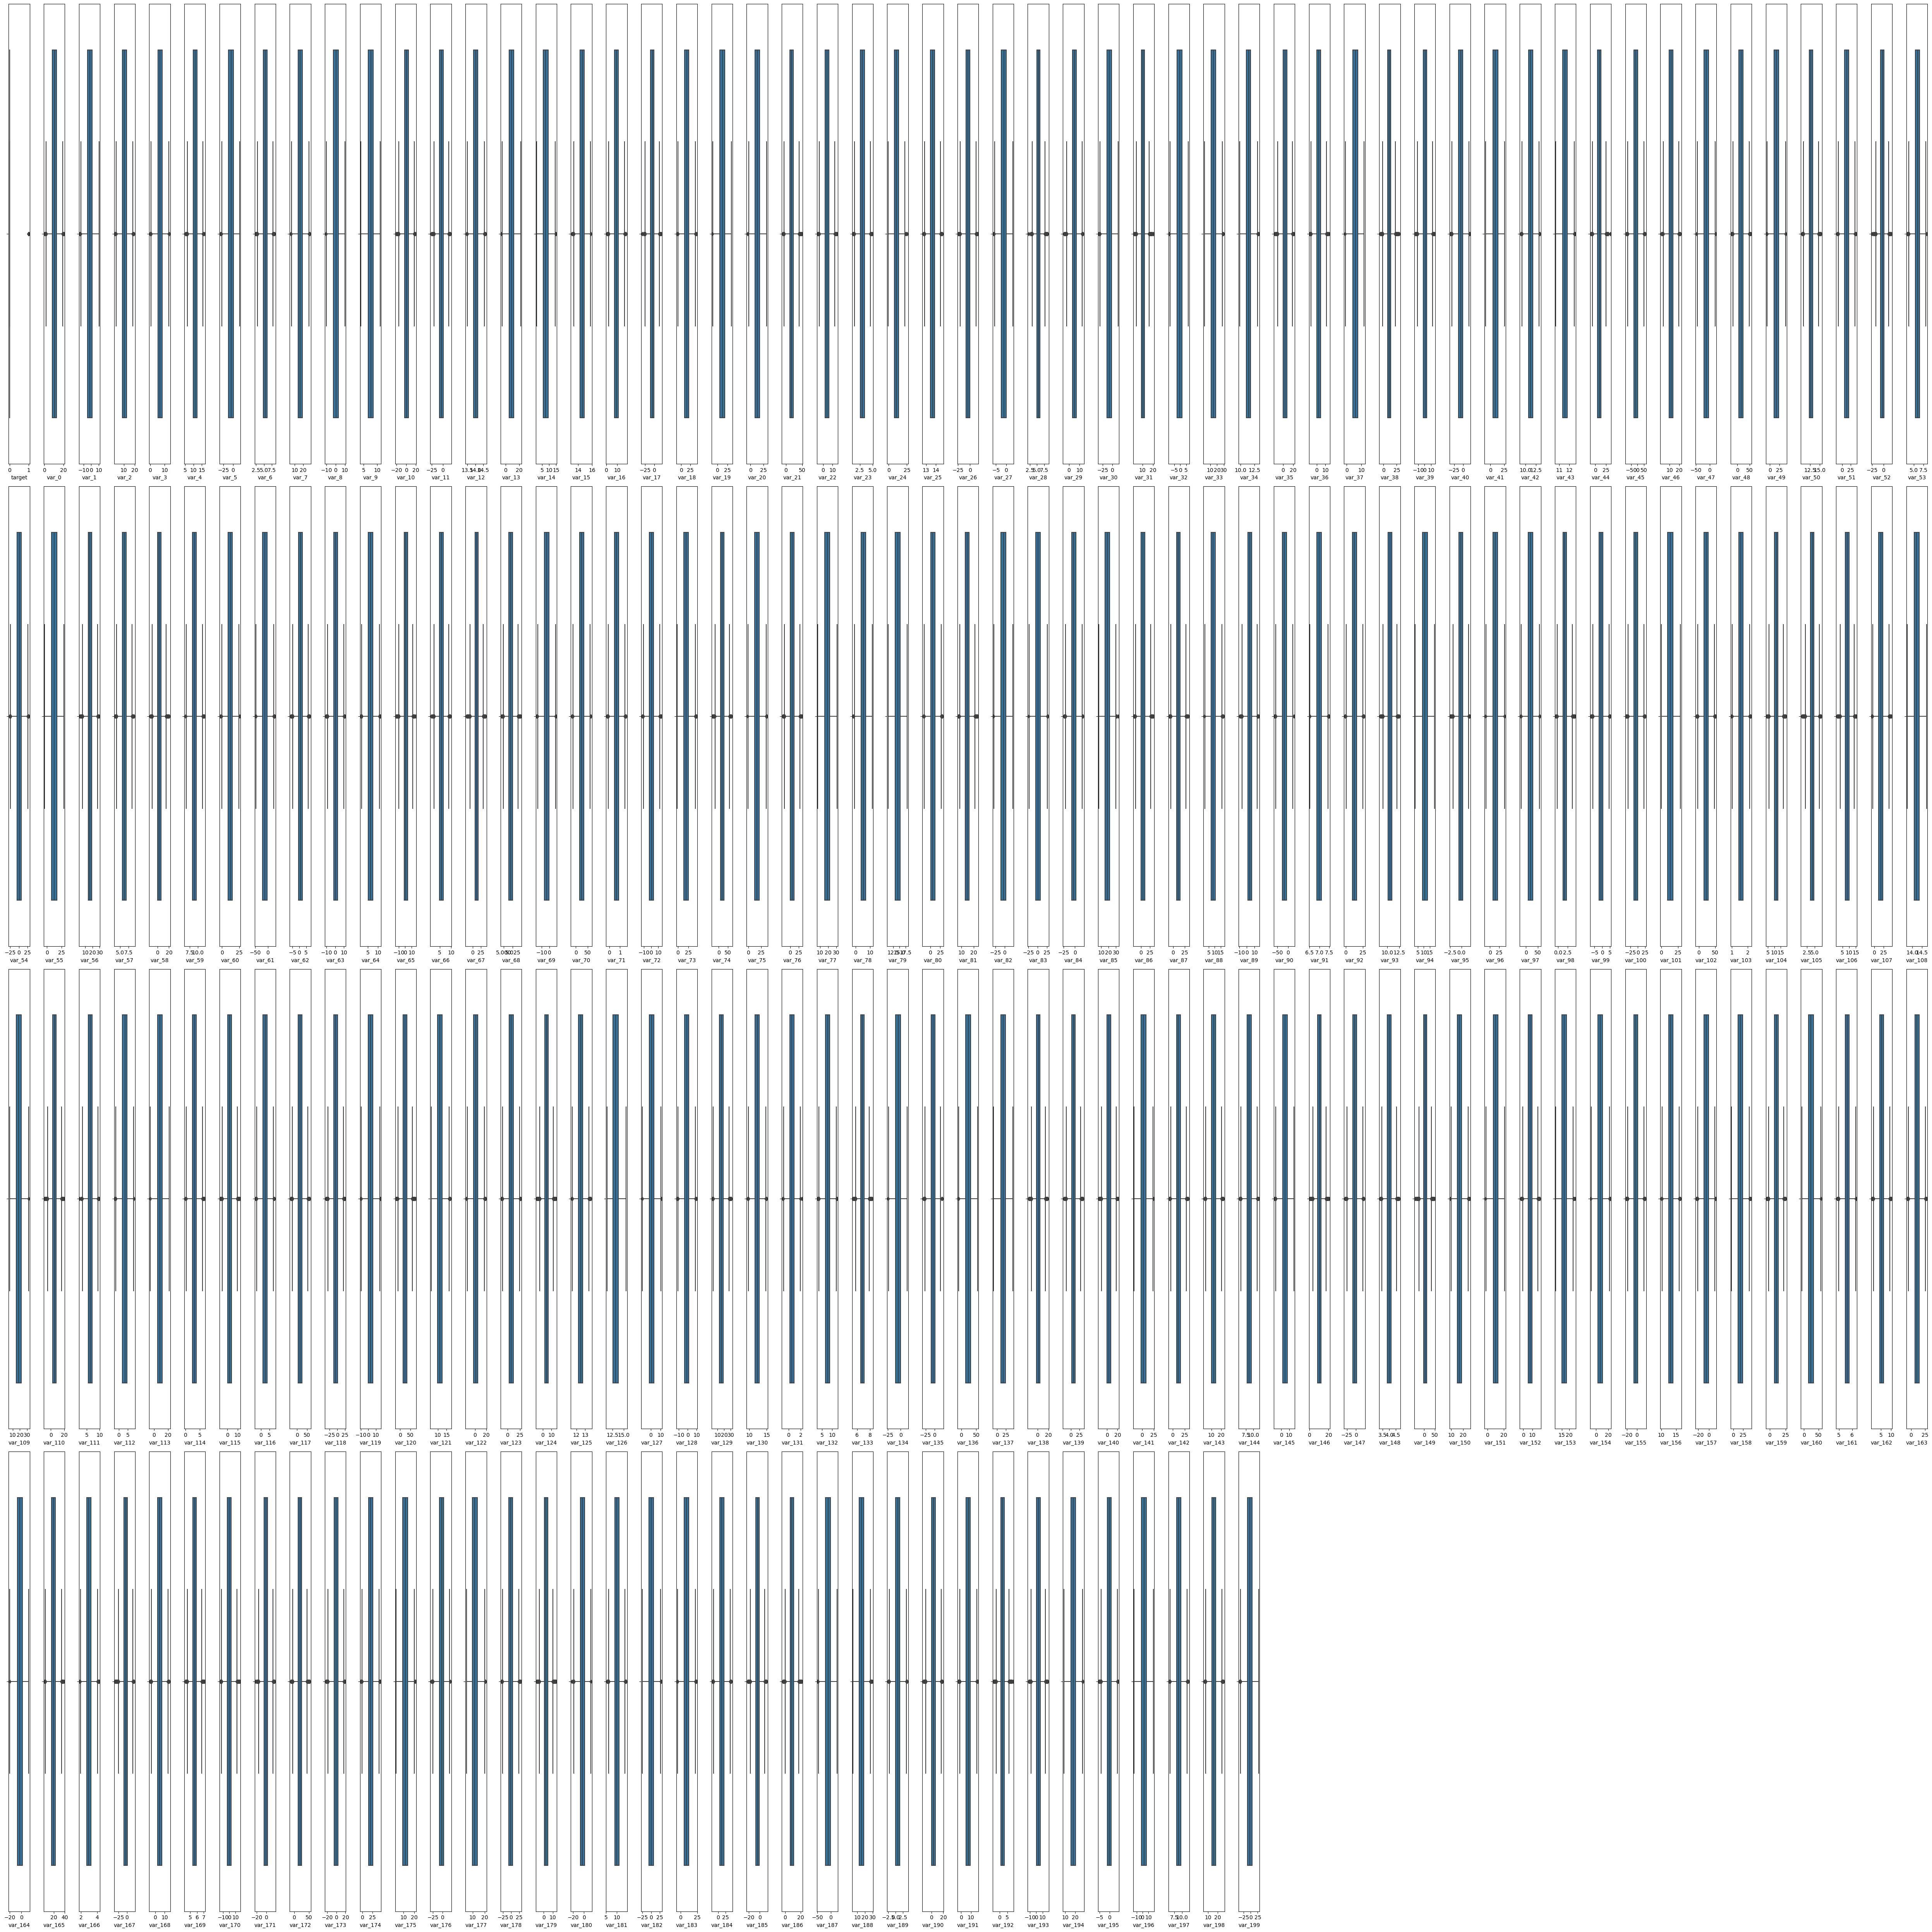

In [17]:
plt.figure(figsize=(50,50))
i=1
for column in df1:
    plt.subplot(4,55,i)
    sns.boxplot(x=df1[column],data=df1)
    i=i+1
plt.tight_layout()

In [18]:
## using IQR to remove the outliers
from scipy import stats
IQR = stats.iqr(df1.var_0, interpolation = 'midpoint') 

IQR

4.304399999999999

In [19]:
## min and max limit calculation

# First quartile (Q1) 
Q1 = df1.var_0.quantile(0.25)

# Third quartile (Q3) 
Q3 =df1.var_0.quantile(0.75)

##getting the limits
min_limit=Q1 - 1.5*IQR

max_limit=Q3 +1.5*IQR

In [20]:
len(df1.loc[df1['var_0']>max_limit])/len(df1)

0.000295

In [21]:
len(df1.loc[df1['var_0']<min_limit])/len(df1)

0.000225

In [22]:
import pandas as pd

# Assuming df is your DataFrame

# Set the threshold for outlier detection (you can adjust this as needed)
outlier_threshold = 1.5

# Set the number of data points (n) for which you want to check the outlier percentage
n = 200000  # Change this to your desired value

# Create an empty dictionary to store the outlier percentages
outlier_percentages = {}

# Iterate through each column in the DataFrame
for i in range(202):  # Assuming you have columns named var_0 to var_201
    column_name = f'var_{i}'
    if column_name in df.columns:
        # Check for outliers using IQR method for the first n data points
        Q1 = df[column_name].head(n).quantile(0.25)
        Q3 = df[column_name].head(n).quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - outlier_threshold * IQR
        upper_bound = Q3 + outlier_threshold * IQR

        # Count the number of outliers
        num_outliers = ((df[column_name].head(n) < lower_bound) | (df[column_name].head(n) > upper_bound)).sum()

        # Calculate the percentage of outliers
        percentage_outliers = (num_outliers / n) * 100

        # Store the result in the dictionary
        outlier_percentages[column_name] = percentage_outliers

# Print the total outlier percentages for each column
for column, percentage in outlier_percentages.items():
    print(f"Column '{column}': {percentage:.2f}% outliers in the first {n} data points")


Column 'var_0': 0.05% outliers in the first 200000 data points
Column 'var_1': 0.00% outliers in the first 200000 data points
Column 'var_2': 0.02% outliers in the first 200000 data points
Column 'var_3': 0.01% outliers in the first 200000 data points
Column 'var_4': 0.04% outliers in the first 200000 data points
Column 'var_5': 0.00% outliers in the first 200000 data points
Column 'var_6': 0.06% outliers in the first 200000 data points
Column 'var_7': 0.01% outliers in the first 200000 data points
Column 'var_8': 0.00% outliers in the first 200000 data points
Column 'var_9': 0.00% outliers in the first 200000 data points
Column 'var_10': 0.06% outliers in the first 200000 data points
Column 'var_11': 0.15% outliers in the first 200000 data points
Column 'var_12': 0.02% outliers in the first 200000 data points
Column 'var_13': 0.00% outliers in the first 200000 data points
Column 'var_14': 0.00% outliers in the first 200000 data points
Column 'var_15': 0.01% outliers in the first 20000

Here we have the total number of outlier Percentage for each of the columns, now we need to replace the Outlier values with the median values for the columns having outliers lesser than 5%

In [23]:
import pandas as pd
import numpy as np

# Assuming df is your DataFrame with more than 200 columns

# Function to replace outliers in a column using IQR
def replace_outliers_iqr(column):
    # Calculate the IQR
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    
    # Define the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Replace outliers with Median 
    column[(column < lower_bound) | (column > upper_bound)] = np.median

# Loop through each column in the DataFrame
for column in df.columns:
    # Calculate the percentage of outliers in the column
    outlier_percentage = df[column].isnull().sum() / len(df) * 100
    
    # If the outlier percentage is greater than 5%, replace outliers using IQR
    if outlier_percentage > 5:
        replace_outliers_iqr(df[column])

# Now, you have replaced the outliers in columns where the percentage of outliers is greater than 5%


Here most of the Outliers column has been replaced with the median values

In [24]:
import pandas as pd

# Assuming df is your DataFrame

# Set the threshold for outlier detection (you can adjust this as needed)
outlier_threshold = 1.5

# Set the number of data points (n) for which you want to check the outlier percentage
n = 200000  # Change this to your desired value

# Create an empty dictionary to store the outlier percentages
outlier_percentages = {}

# Iterate through each column in the DataFrame
for i in range(202):  # Assuming you have columns named var_0 to var_201
    column_name = f'var_{i}'
    if column_name in df.columns:
        # Check for outliers using IQR method for the first n data points
        Q1 = df[column_name].head(n).quantile(0.25)
        Q3 = df[column_name].head(n).quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - outlier_threshold * IQR
        upper_bound = Q3 + outlier_threshold * IQR

        # Count the number of outliers
        num_outliers = ((df[column_name].head(n) < lower_bound) | (df[column_name].head(n) > upper_bound)).sum()

        # Calculate the percentage of outliers
        percentage_outliers = (num_outliers / n) * 100

        # Store the result in the dictionary
        outlier_percentages[column_name] = percentage_outliers

# Print the total outlier percentages for each column
for column, percentage in outlier_percentages.items():
    print(f"Column '{column}': {percentage:.2f}% outliers in the first {n} data points")


Column 'var_0': 0.05% outliers in the first 200000 data points
Column 'var_1': 0.00% outliers in the first 200000 data points
Column 'var_2': 0.02% outliers in the first 200000 data points
Column 'var_3': 0.01% outliers in the first 200000 data points
Column 'var_4': 0.04% outliers in the first 200000 data points
Column 'var_5': 0.00% outliers in the first 200000 data points
Column 'var_6': 0.06% outliers in the first 200000 data points
Column 'var_7': 0.01% outliers in the first 200000 data points
Column 'var_8': 0.00% outliers in the first 200000 data points
Column 'var_9': 0.00% outliers in the first 200000 data points
Column 'var_10': 0.06% outliers in the first 200000 data points
Column 'var_11': 0.15% outliers in the first 200000 data points
Column 'var_12': 0.02% outliers in the first 200000 data points
Column 'var_13': 0.00% outliers in the first 200000 data points
Column 'var_14': 0.00% outliers in the first 200000 data points
Column 'var_15': 0.01% outliers in the first 20000

Most of the Columns having the Outlier values greater than 5% has been replaced and we now we need to do manually for the columns whose outliers are not changed.

In [25]:
df.loc[df['var_4']<min_limit,'var_4']=np.median(df.var_4)

In [26]:
df.loc[df['var_4']>max_limit,'var_4']=np.median(df.var_4)

Outlier value has been manually changed for the column var_4

In [27]:
df.loc[df['var_12']<min_limit,'var_12']=np.median(df.var_12)

In [28]:
df.loc[df['var_12']>max_limit,'var_12']=np.median(df.var_12)

Outlier value has been manually changed for the column var_12

In [29]:
df.loc[df['var_16']<min_limit,'var_16']=np.median(df.var_16)

In [30]:
df.loc[df['var_16']>max_limit,'var_16']=np.median(df.var_16)

Outlier value has been manually changed for the column var_16

In [31]:
df.loc[df['var_23']>max_limit,'var_23']=np.median(df.var_23)

In [32]:
df.loc[df['var_23']<min_limit,'var_23']=np.median(df.var_23)

Outlier value has been manually changed for the column var_23

In [33]:
df.loc[df['var_59']>max_limit,'var_59']=np.median(df.var_59)

In [34]:
df.loc[df['var_59']<min_limit,'var_59']=np.median(df.var_59)

Outlier value has been manually changed for the column var_59

In [35]:
df.loc[df['var_61']>max_limit,'var_61']=np.median(df.var_61)

In [36]:
df.loc[df['var_61']<min_limit,'var_61']=np.median(df.var_61)

Outlier value has been manually changed for the column var_61

In [37]:
df.loc[df['var_89']>max_limit,'var_89']=np.median(df.var_89)

In [38]:
df.loc[df['var_89']<min_limit,'var_89']=np.median(df.var_89)

Outlier value has been manually changed for the column var_89

In [39]:
df.loc[df['var_99']>max_limit,'var_99']=np.median(df.var_99)

In [40]:
df.loc[df['var_99']<min_limit,'var_99']=np.median(df.var_99)

Outlier value has been manually changed for the column var_99

In [41]:
df.loc[df['var_107']>max_limit,'var_107']=np.median(df.var_107)

In [42]:
df.loc[df['var_107']<min_limit,'var_107']=np.median(df.var_107)

Outlier value has been manually changed for the column var_107

In [43]:
df.loc[df['var_111']>max_limit,'var_111']=np.median(df.var_111)

In [44]:
df.loc[df['var_111']<min_limit,'var_111']=np.median(df.var_111)

Outlier value has been manually changed for the column var_111

In [45]:
df.loc[df['var_191']>max_limit,'var_191']=np.median(df.var_191)

In [46]:
df.loc[df['var_191']<min_limit,'var_191']=np.median(df.var_191)

Outlier value has been manually changed for the column var_191

In [47]:
df.loc[df['var_197']>max_limit,'var_197']=np.median(df.var_197)

In [48]:
df.loc[df['var_197']<min_limit,'var_197']=np.median(df.var_197)

Outlier value has been manually changed for the column var_197

# Feature Engineering:

In [49]:
import pandas as pd

# Assuming df is your DataFrame
column_names = df.columns.tolist()

# Print the column names
print(column_names)


['ID_code', 'target', 'var_0', 'var_1', 'var_2', 'var_3', 'var_4', 'var_5', 'var_6', 'var_7', 'var_8', 'var_9', 'var_10', 'var_11', 'var_12', 'var_13', 'var_14', 'var_15', 'var_16', 'var_17', 'var_18', 'var_19', 'var_20', 'var_21', 'var_22', 'var_23', 'var_24', 'var_25', 'var_26', 'var_27', 'var_28', 'var_29', 'var_30', 'var_31', 'var_32', 'var_33', 'var_34', 'var_35', 'var_36', 'var_37', 'var_38', 'var_39', 'var_40', 'var_41', 'var_42', 'var_43', 'var_44', 'var_45', 'var_46', 'var_47', 'var_48', 'var_49', 'var_50', 'var_51', 'var_52', 'var_53', 'var_54', 'var_55', 'var_56', 'var_57', 'var_58', 'var_59', 'var_60', 'var_61', 'var_62', 'var_63', 'var_64', 'var_65', 'var_66', 'var_67', 'var_68', 'var_69', 'var_70', 'var_71', 'var_72', 'var_73', 'var_74', 'var_75', 'var_76', 'var_77', 'var_78', 'var_79', 'var_80', 'var_81', 'var_82', 'var_83', 'var_84', 'var_85', 'var_86', 'var_87', 'var_88', 'var_89', 'var_90', 'var_91', 'var_92', 'var_93', 'var_94', 'var_95', 'var_96', 'var_97', 'var_98'

In [50]:
df

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,5.7470,2.9252,3.1821,14.0137,0.5745,8.7989,14.5691,5.7487,-7.2393,4.2840,30.7133,10.5350,16.2191,2.5791,2.4716,14.3831,13.4325,-5.1488,-0.4073,4.9306,5.9965,-0.3085,12.9041,-3.8766,16.8911,11.1920,10.5785,0.6764,7.8871,4.6667,3.8743,-5.2387,7.3746,11.5767,12.0446,11.6418,-7.0170,5.9226,-14.2136,16.0283,5.3253,12.9194,29.0460,-0.6940,5.1736,-0.7474,14.8322,11.2668,5.3822,2.0183,10.1166,16.1828,4.959,2.0771,-0.2154,8.6748,9.5319,5.8056,22.4321,5.0109,-4.7010,21.6374,0.5663,5.1999,8.8600,43.1127,18.3816,-2.3440,23.4104,6.5199,12.1983,13.6468,13.8372,1.3675,2.9423,-4.5213,21.4669,9.3225,16.4597,7.9984,3.64255,-21.4494,6.7806,11.0924,9.9913,14.8421,0.1812,8.9642,16.2572,2.1743,-0.7713,9.4763,13.3102,26.5376,1.4403,14.7100,6.0454,9.5426,17.1554,14.1104,24.3627,2.0323,6.7602,3.9141,-0.4851,2.5240,1.5093,2.5516,15.5752,-13.4221,7.2739,16.0094,9.7268,0.8897,0.7754,4.2218,12.0039,13.8571,-0.7338,-1.9245,15.4462,12.8287,0.3587,9.6508,6.5674,5.1726,3.1345,29.4547,31.4045,2.8279,15.6599,8.3307,-5.6011,19.0614,11.2663,8.6989,8.3694,11.5659,-16.4727,4.0288,17.9244,18.5177,10.7800,9.0056,16.6964,10.4838,1.6573,12.1749,-13.1324,17.6054,11.5423,15.4576,5.3133,3.6159,5.0384,6.6760,12.6644,2.7004,-0.6975,9.5981,5.4879,-4.7645,-8.4254,20.8773,3.1531,18.5618,7.7423,-10.1245,13.7241,-3.5189,1.7202,-8.4051,9.0164,3.0657,14.3691,25.8398,5.8764,11.8411,-19.7159,17.5743,0.5857,4.4354,3.96420,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,8.0851,-0.4032,8.0585,14.0239,8.4135,5.4345,13.7003,13.8275,-15.5849,7.8000,28.5708,3.4287,2.7407,8.5524,3.3716,6.9779,13.8910,-11.7684,-2.5586,5.0464,0.5481,-9.2987,7.8755,1.2859,19.3710,11.3702,0.7399,2.7995,5.8434,10.8160,3.6783,-11.1147,1.8730,9.8775,11.7842,1.2444,-47.3797,7.3718,0.1948,34.4014,25.7037,11.8343,13.2256,-4.1083,6.6885,-8.0946,18.5995,19.3219,7.0118,1.9210,8.8682,8.0109,-11.892,1.7944,-1.3147,8.1042,1.5365,5.4007,7.9344,5.0220,2.2302,40.5632,0.5134,3.1701,20.1068,7.7841,7.0529,3.2709,23.4822,5.5075,13.7814,2.5462,18.1782,0.3683,-4.8210,-5.4850,13.7867,-13.5901,11.0993,7.9022,12.23010,0.4768,6.8852,8.0905,10.9631,11.7569,-1.2722,24.7876,26.6881,1.8944,-0.7713,-13.6950,8.4068,35.4734,1.7093,15.1866,2.6227,7.3412,17.5732,13.9550,13.0858,6.6203,7.1051,5.3523,8.5426,3.6159,4.1569,3.0454,7.8522,-11.5100,7.5109,31.5899,9.5018,8.2736,10.1633,0.1225,12.5942,14.56

In [51]:
df.drop('ID_code',inplace=True,axis=1)

Dropped the column ID_code from the original data set because this column does not contain any of the useful Information:

In [52]:
# checking correlation
# Correlation Only for Continous Data so We extract the continous data for correlation  and also drop the target
Corr_data=df[['var_0', 'var_1', 'var_2', 'var_3', 'var_4', 'var_5', 'var_6', 'var_7', 'var_8', 'var_9', 'var_10', 'var_11', 'var_12', 'var_13', 'var_14', 'var_15', 'var_16', 'var_17', 'var_18', 'var_19', 'var_20', 'var_21', 'var_22', 'var_23', 'var_24', 'var_25', 'var_26', 'var_27', 'var_28', 'var_29', 'var_30', 'var_31', 'var_32', 'var_33', 'var_34', 'var_35', 'var_36', 'var_37', 'var_38', 'var_39', 
              'var_40', 'var_41', 'var_42', 'var_43', 'var_44', 'var_45', 'var_46', 'var_47', 'var_48', 'var_49', 'var_50', 'var_51', 'var_52', 'var_53', 'var_54', 'var_55', 'var_56', 'var_57', 'var_58', 'var_59', 'var_60', 'var_61', 'var_62', 'var_63', 'var_64', 'var_65', 'var_66', 'var_67', 'var_68', 'var_69', 'var_70', 'var_71', 'var_72', 'var_73', 'var_74', 'var_75', 'var_76', 'var_77', 'var_78', 
              'var_79', 'var_80', 'var_81', 'var_82', 'var_83', 'var_84', 'var_85', 'var_86', 'var_87', 'var_88', 'var_89', 'var_90', 'var_91', 'var_92', 'var_93', 'var_94', 'var_95', 'var_96', 'var_97', 'var_98', 
              'var_99', 'var_100', 'var_101', 'var_102', 'var_103', 'var_104', 'var_105', 'var_106', 'var_107', 'var_108', 'var_109', 'var_110', 'var_111', 'var_112', 'var_113', 'var_114', 'var_115', 'var_116', 'var_117', 'var_118', 'var_119', 'var_120', 'var_121', 'var_122', 'var_123', 'var_124', 'var_125', 'var_126', 'var_127', 'var_128', 'var_129', 'var_130', 'var_131', 'var_132', 'var_133', 'var_134', 
              'var_135', 'var_136', 'var_137', 'var_138', 'var_139', 'var_140', 'var_141', 'var_142', 'var_143', 'var_144', 'var_145', 'var_146', 'var_147', 'var_148', 'var_149', 'var_150', 'var_151', 'var_152', 'var_153', 'var_154', 'var_155', 'var_156', 'var_157', 'var_158', 'var_159', 'var_160', 'var_161', 'var_162', 'var_163', 'var_164', 'var_165', 'var_166', 'var_167', 'var_168', 'var_169', 'var_170',
              'var_171', 'var_172', 'var_173', 'var_174', 'var_175', 'var_176', 'var_177', 'var_178', 'var_179', 'var_180', 'var_181', 'var_182', 'var_183', 'var_184', 'var_185', 'var_186', 'var_187', 'var_188', 'var_189', 'var_190', 'var_191', 'var_192', 'var_193', 'var_194', 'var_195', 'var_196', 'var_197', 'var_198', 'var_199']]

In [53]:
Corr_data.corr()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
var_0,1.000000,-0.000544,0.006573,0.003801,0.001326,0.003046,0.006983,0.002429,0.004962,-0.002613,0.000355,0.003468,-0.001996,-0.002717,-0.004584,-0.000043,0.001106,-0.001664,0.004292,0.001505,-0.000932,0.000781,0.002322,-0.001348,0.003658,0.001158,0.006117,0.000985,0.001081,-0.000426,0.003187,-0.002097,0.000274,-0.003343,-0.003933,0.001469,-0.002556,-0.000253,-0.000470,-0.001409,0.006798,0.001152,-0.000440,0.002685,-0.003003,-0.001539,0.000129,0.004062,0.003767,0.000524,-0.004678,0.001217,0.003037,0.001259,-0.000783,-0.001055,-0.000318,-0.003824,-0.002385,-0.001962,0.002243,-0.003320,0.000718,-0.001647,-0.001589,0.002835,-0.000225,0.003361,0.004286,-0.001448,0.001140,0.001417,-0.003589,0.000295,0.005504,0.000356,-0.007175,0.000374,0.001557,0.003704,-0.002882,-0.005575,-0.000841,-0.000818,-0.000827,0.001919,-0.000987,-0.000284,-0.004843,0.003318,-0.005071,0.000278,0.001133,-0.000220,0.001620,-0.000036,0.003087,-0.002611,-0.000541,0.000701,-0.001015,0.001022,0.001195,-0.002185,-0.000384,-0.000527,0.004329,-0.004512,-0.002046,-0.004159,0.005662,0.001961,0.001128,-0.001759,0.000722,0.000657,-0.004283,-0.000669,0.001828,-0.002476,0.000251,-0.003118,-0.000987,-0.007402,-0.001754,0.000896,-0.004338,-0.004164,-0.001196,-0.001827,0.000864,-0.002961,0.002217,0.002628,0.002141,0.004496,0.001554,-0.001635,-0.001303,-0.006375,0.002477,-0.002321,-0.003682,0.002822,0.006261,0.002669,0.001057,0.001878,-0.001843,-0.005004,-0.000163,0.000953,-0.000925,0.000189,-0.003217,0.002413,-0.002712,0.002304,-0.001100,0.000189,-0.002975,-0.004248,0.000719,0.000320,-0.000132,-0.002302,-0.007269,0.002156,0.001848,-0.004478,0.002574,0.001678,-0.005587,0.002499,-0.000683,-0.000546,0.001197,0.000953,0.001165,0.003447,0.001939,0.001952,-0.001957,-0.001721,-0.000554,0.001868,0.001267,0.001413,0.001770,0.000543,0.002752,-0.000483,-0.005373,0.001616,-0.001514,0.002073,0.004386,-0.000753,-0.005776,0.003850
var_1,-0.000544,1.000000,0.003980,0.000010,0.000303,-0.000902,0.003258,0.001511,0.004098,-0.000832,0.002875,0.004778,-0.001977,-0.001303,-0.001544,0.004946,-0.002286,-0.001180,0.000289,0.001246,-0.002255,-0.001519,0.001762,0.003237,0.001417,0.000844,0.004778,-0.004551,-0.002463,0.006328,-0.002244,-0.002811,0.002713,0.001072,-0.002965,0.004293,-0.004466,-0.000122,0.001545,-0.000754,0.001830,0.001240,0.002492,-0.002299,-0.006390,-0.003510,-0.002197,0.004786,0.000111,0.003956,0.000057,0.004052,0.001637,0.005195,-0.004447,0.000314,0.000318,0.002675,-0.003877,0.000610,0.000567,-0.000850,0.000417,0.003081,

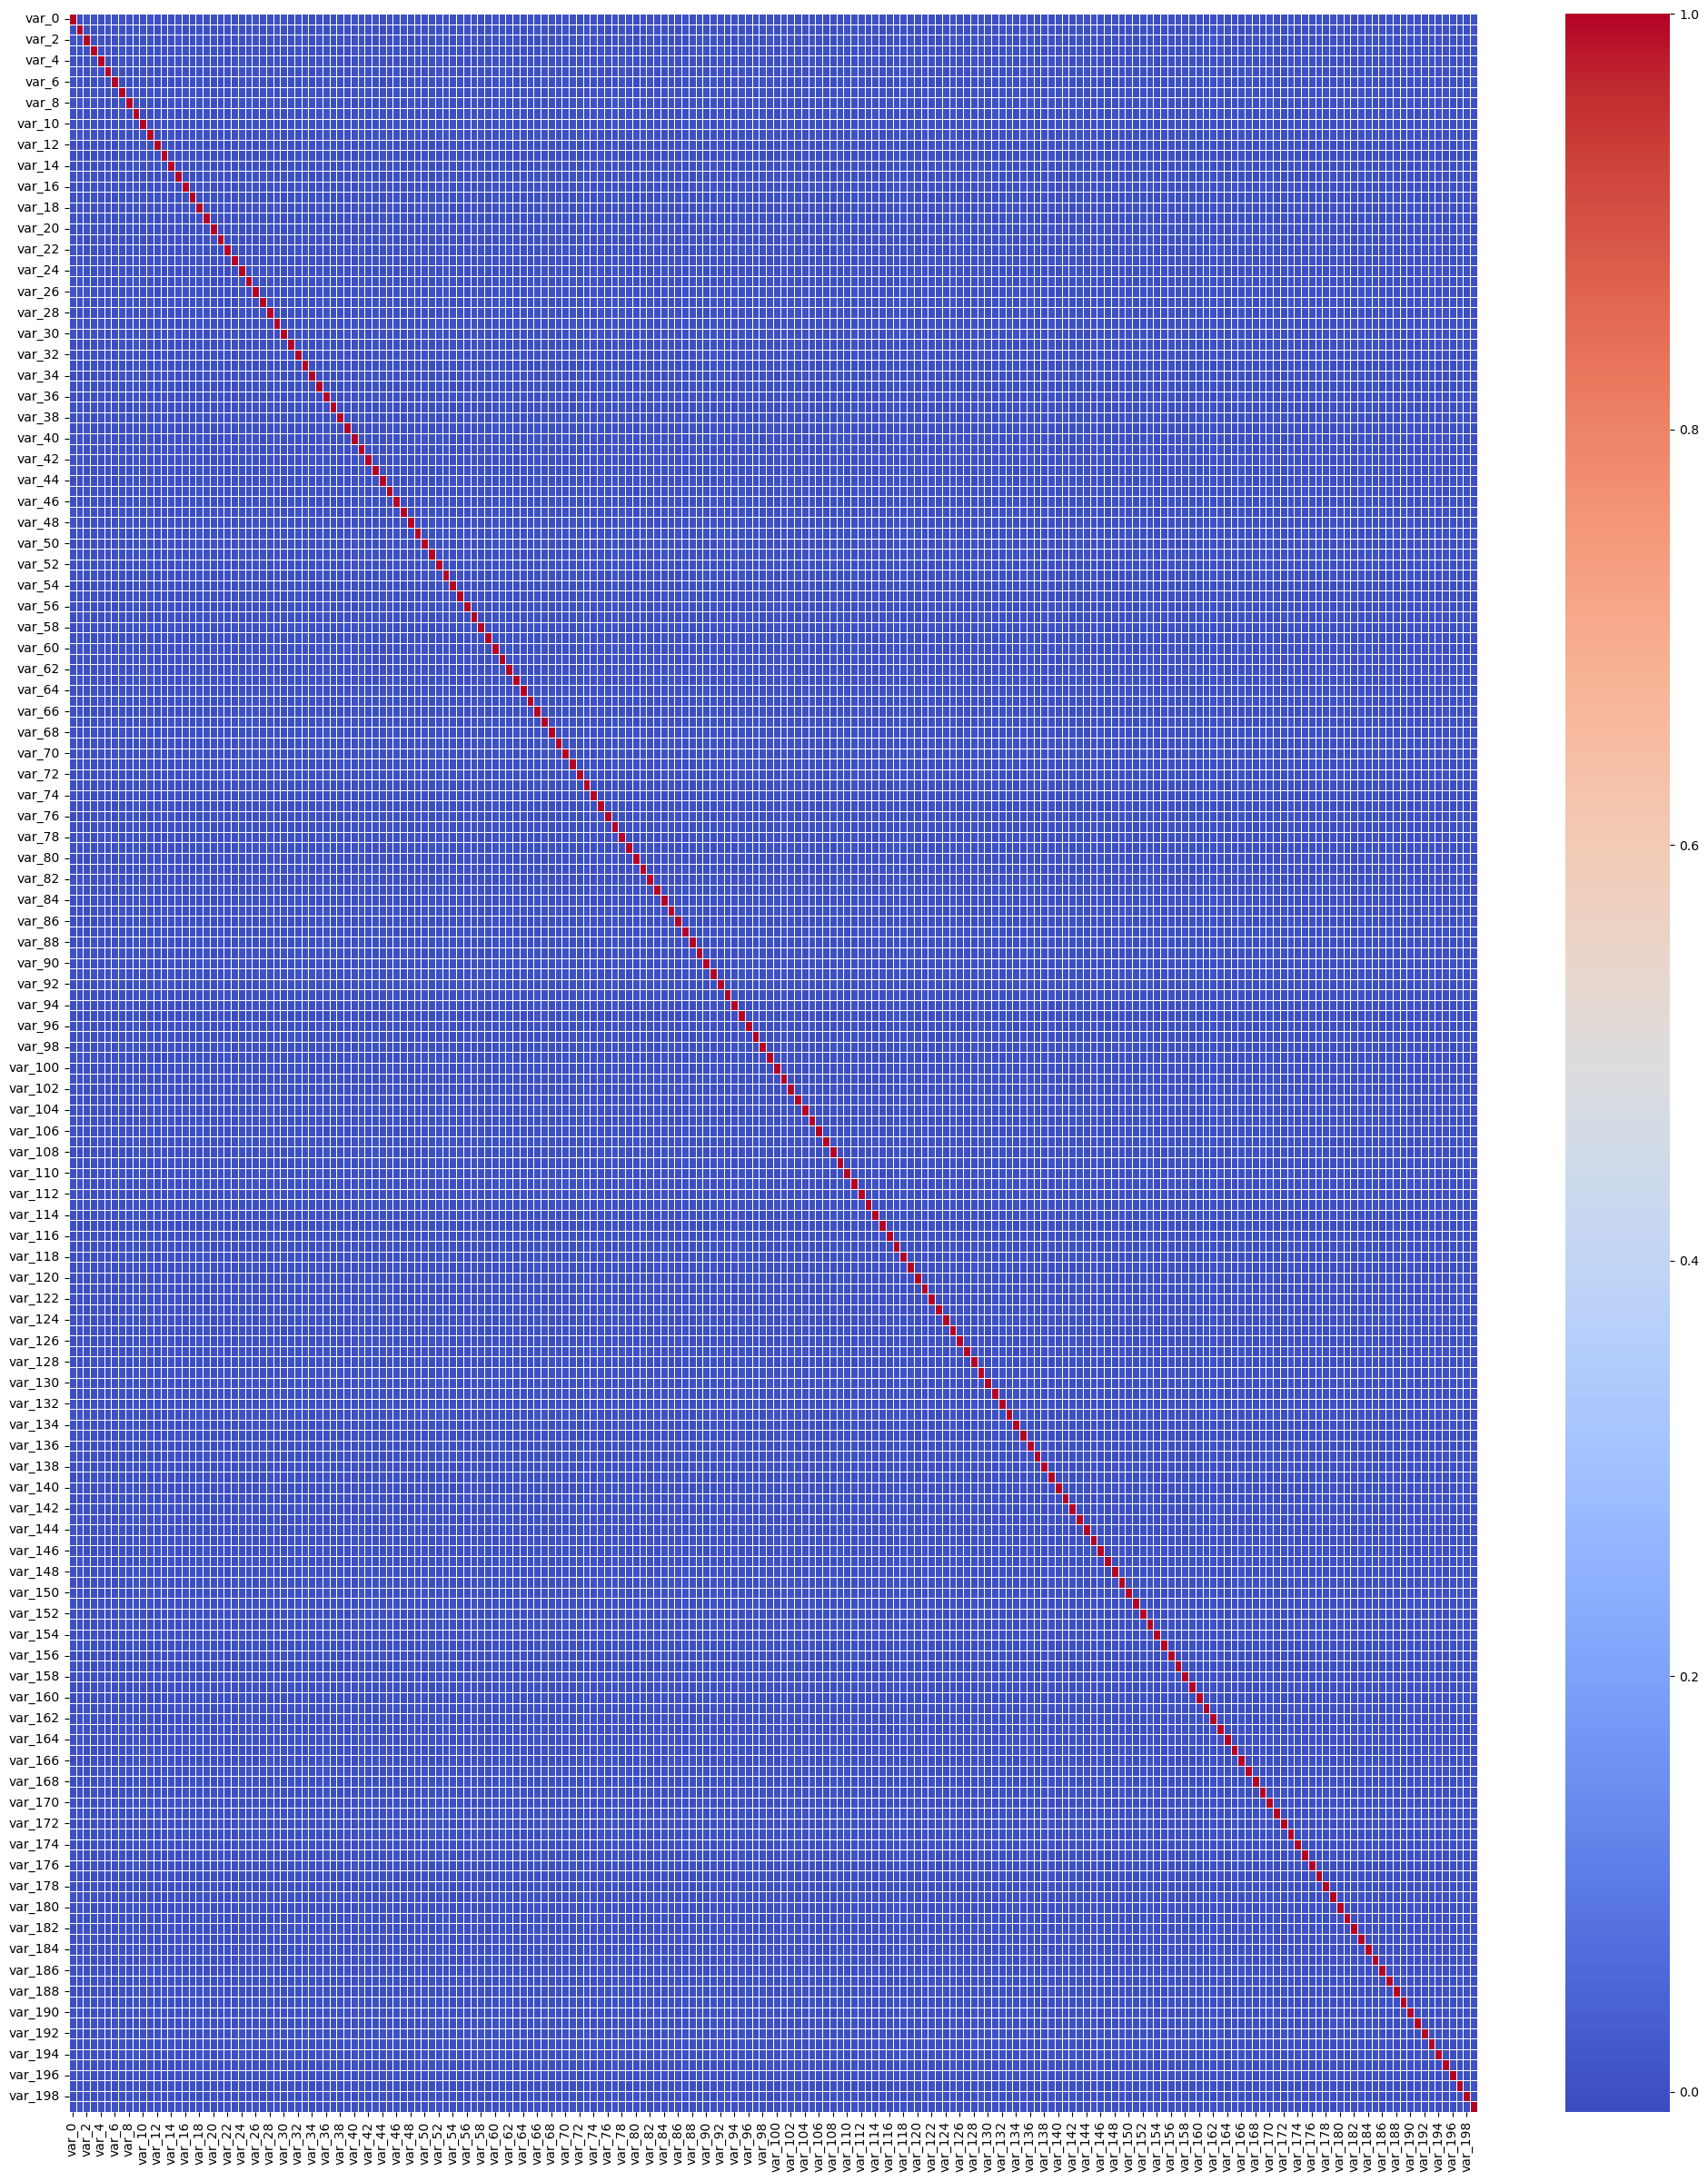

In [54]:
# Assuming df is your DataFrame with 202 columns

# Calculate the correlation matrix
correlation_matrix = Corr_data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(25,30))

# Create a heatmap using Seaborn
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=False, fmt=".2f", linewidths=0.5)

# Show the plot
plt.show()


There are no highly corelated values found in the data

# Model creation:

In [55]:
x=df.drop('target',axis=1)
y=df[['target']]

In [56]:
# importing train and test set:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

# Logistic Regression:

In [57]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [58]:
lr.fit(x_train,y_train)

LogisticRegression()

In [105]:
y_predict=lr.predict(x_test)

# Model Evaluation:

In [106]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score,classification_report,accuracy_score

In [111]:
log_acc_sc=accuracy_score(y_test,y_predict)
print(log_acc_sc)

0.89685


In [108]:
cls_rep=classification_report(y_test,y_predict)
print(cls_rep)

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     53856
           1       0.68      0.23      0.34      6144

    accuracy                           0.91     60000
   macro avg       0.80      0.61      0.65     60000
weighted avg       0.89      0.91      0.89     60000



# Plotting ROC Curve:

In [63]:
from sklearn.metrics import roc_curve,roc_auc_score
%matplotlib inline

0.8482956896680113


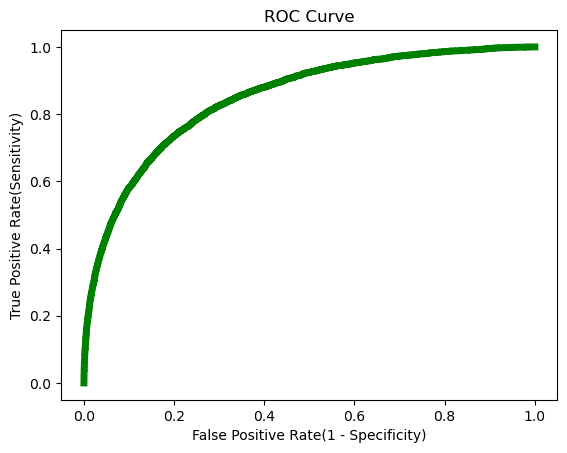

In [64]:
y_predict1 =lr.predict_proba(x_test)[:,1]
fpr,tpr,thresholds = roc_curve(y_test,y_predict1)
plt.title('ROC Curve')
plt.xlabel('False Positive Rate(1 - Specificity)')
plt.ylabel('True Positive Rate(Sensitivity)')
plt.plot(fpr,tpr,color='green',lw=5)
print(roc_auc_score(y_test,y_predict1))
plt.show()

Insights:
   Our linear model's prediction accuracy score is 91%. so our linear regression model accounts for approximately
91% of the variance.

# KNN REGRESSOR:

In [65]:
from sklearn.neighbors import KNeighborsClassifier
KNN=KNeighborsClassifier(n_neighbors=5)

In [66]:
KNN.fit(x_train,y_train)

KNeighborsClassifier()

In [109]:
y_predict=KNN.predict(x_test)

# Model Evaluation:

In [112]:
knn_acc_sc=accuracy_score(y_test,y_predict)
print(knn_acc_sc)

0.89685


In [69]:
cls_rep=classification_report(y_test,y_predict)
print(cls_rep)

              precision    recall  f1-score   support

           0       0.90      1.00      0.95     53856
           1       0.22      0.00      0.01      6144

    accuracy                           0.90     60000
   macro avg       0.56      0.50      0.48     60000
weighted avg       0.83      0.90      0.85     60000



0.5387458023068268


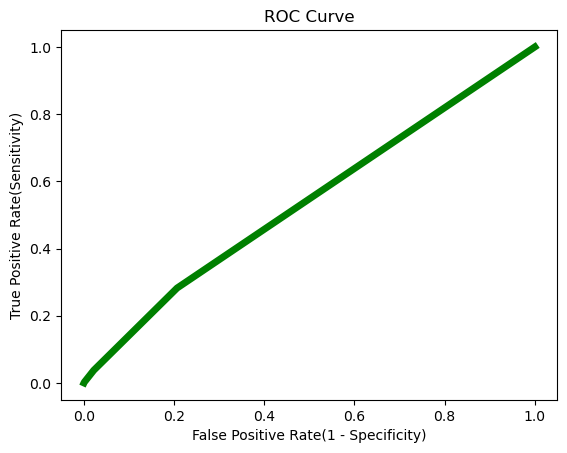

In [70]:
y_predict1 =KNN.predict_proba(x_test)[:,1]
fpr,tpr,thresholds = roc_curve(y_test,y_predict1)
plt.title('ROC Curve')
plt.xlabel('False Positive Rate(1 - Specificity)')
plt.ylabel('True Positive Rate(Sensitivity)')
plt.plot(fpr,tpr,color='green',lw=5)
print(roc_auc_score(y_test,y_predict1))
plt.show()

Insights:Our KNN model's prediction accuracy score is 90%. so our linear regression model accounts for approximately 90% of the variance.

# Decision Tree:

In [71]:
from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier()

In [72]:
DT.fit(x_train,y_train)

DecisionTreeClassifier()

In [73]:
y_predict=DT.predict(x_test)

# Model Evaluation:

In [74]:
acc_sc=accuracy_score(y_test,y_predict)
print(acc_sc)

0.8325833333333333


In [75]:
cls_rep=classification_report(y_test,y_predict)
print(cls_rep)

              precision    recall  f1-score   support

           0       0.91      0.90      0.91     53856
           1       0.20      0.21      0.20      6144

    accuracy                           0.83     60000
   macro avg       0.55      0.56      0.56     60000
weighted avg       0.84      0.83      0.83     60000



# Hyperparametric Tunning :

In [144]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2', None]
}
dt_classifier = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(dt_classifier, param_grid, scoring='r2', cv=5, verbose=2)
grid_search.fit(x, y)
best_params = grid_search.best_params_
print("Best Hyperparameters:")
print(best_params)

Fitting 5 folds for each of 180 candidates, totalling 900 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2; total time=  15.4s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2; total time=  16.2s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2; total time=  12.5s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2; total time=  12.3s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2; total time=  12.4s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5; total time=  12.2s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5; total time=  12.5s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5; total time=  11.7s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5; total time=  12.0s
[

In [76]:
dtcls=DecisionTreeClassifier(max_depth= 10,max_features='log2',min_samples_leaf=2,min_samples_split=5)

In [77]:
dtcls.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=10, max_features='log2', min_samples_leaf=2,
                       min_samples_split=5)

In [113]:
y_pred=dtcls.predict(x_test)

# Model Evaluation:

In [114]:
dt_acc_sc=accuracy_score(y_pred,y_test)
print(dt_acc_sc)

0.89445


In [80]:
cls_rep=classification_report(y_test,y_pred)
print(cls_rep)

              precision    recall  f1-score   support

           0       0.90      0.99      0.94     53856
           1       0.31      0.02      0.04      6144

    accuracy                           0.89     60000
   macro avg       0.60      0.51      0.49     60000
weighted avg       0.84      0.89      0.85     60000



0.5563545612373737


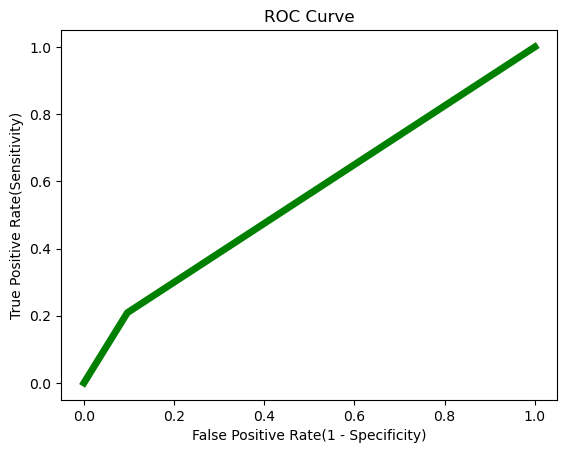

In [81]:
y_predict1 =DT.predict_proba(x_test)[:,1]
fpr,tpr,thresholds = roc_curve(y_test,y_predict1)
plt.title('ROC Curve')
plt.xlabel('False Positive Rate(1 - Specificity)')
plt.ylabel('True Positive Rate(Sensitivity)')
plt.plot(fpr,tpr,color='green',lw=5)
print(roc_auc_score(y_test,y_predict1))
plt.show()

# Gradient Boosting:

In [82]:
from sklearn.ensemble import GradientBoostingClassifier
GBC=GradientBoostingClassifier()

In [83]:
GBC.fit(x_train,y_train)

GradientBoostingClassifier()

In [115]:
y_predict=GBC.predict(x_test)

# Model Evaluation:

In [116]:
gb_acc_sc=accuracy_score(y_test,y_predict)
print(gb_acc_sc)

0.9005833333333333


In [86]:
cls_rep=classification_report(y_test,y_predict)
print(cls_rep)

              precision    recall  f1-score   support

           0       0.90      1.00      0.95     53856
           1       0.85      0.04      0.07      6144

    accuracy                           0.90     60000
   macro avg       0.87      0.52      0.51     60000
weighted avg       0.90      0.90      0.86     60000



Insights: Our Gradient Boosting model accuracy score is 90%. so our Gradient Boosting model accounts for approximately 90% of the variance.

# XG Boosting:

In [87]:
import xgboost
from xgboost import XGBClassifier
xgb=XGBClassifier()

In [88]:
xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [117]:
y_pred=xgb.predict(x_test)

# Model Evaluation:

In [118]:
xg_acc_sc=accuracy_score(y_test,y_predict)
print(xg_acc_sc)

0.9005833333333333


In [91]:
cls_rep=classification_report(y_test,y_predict)
print(cls_rep)

              precision    recall  f1-score   support

           0       0.90      1.00      0.95     53856
           1       0.85      0.04      0.07      6144

    accuracy                           0.90     60000
   macro avg       0.87      0.52      0.51     60000
weighted avg       0.90      0.90      0.86     60000



# Random Forest Classifier:

In [92]:
from sklearn.ensemble import RandomForestClassifier
RFC=RandomForestClassifier()

In [93]:
RFC.fit(x_train,y_train)

RandomForestClassifier()

In [119]:
y_predict=RFC.predict(x_test)

# Model Evaluation:

In [120]:
rfc_acc_sc=accuracy_score(y_test,y_predict)
print(rfc_acc_sc)

0.8976166666666666


In [96]:
cls_rep=classification_report(y_test,y_predict)
print(cls_rep)

              precision    recall  f1-score   support

           0       0.90      1.00      0.95     53856
           1       1.00      0.00      0.00      6144

    accuracy                           0.90     60000
   macro avg       0.95      0.50      0.47     60000
weighted avg       0.91      0.90      0.85     60000



# Support Vector Machine:

In [97]:
from sklearn.svm import SVC
SVM=SVC()

In [98]:
SVM.fit(x_train,y_train)

SVC()

In [121]:
y_predict=SVM.predict(x_test)

# Model Evaluation:

In [123]:
svm_acc_sc=accuracy_score(y_predict,y_test)
print(svm_acc_sc)

0.8976


In [102]:
cls_rep=classification_report(y_test,y_predict)
print(cls_rep)

              precision    recall  f1-score   support

           0       0.90      1.00      0.95     53856
           1       0.00      0.00      0.00      6144

    accuracy                           0.90     60000
   macro avg       0.45      0.50      0.47     60000
weighted avg       0.81      0.90      0.85     60000



# NOTE: During Doubt Clearing session we have been advised with Hyperparametric tunning is enough for single Algorithm because the dataset has more number of Rows and columns as it may corrupt the data. So we have done hyperparametric tunning for only one Algorithm.

# Final Report:

In [124]:
scores=[log_acc_sc,knn_acc_sc,dt_acc_sc,gb_acc_sc,xg_acc_sc,rfc_acc_sc,svm_acc_sc]
algorithms=['LogisticRegression','KNN','DecisionTree','GradientBoosting','XGBoosting','RandomForest','SVM']
for i in range(len(algorithms)):
    print("The accuracy Score acheived using " + algorithms[i] + ' is: ' + str(scores[i])+"%")

The accuracy Score acheived using LogisticRegression is: 0.89685%
The accuracy Score acheived using KNN is: 0.89685%
The accuracy Score acheived using DecisionTree is: 0.89445%
The accuracy Score acheived using GradientBoosting is: 0.9005833333333333%
The accuracy Score acheived using XGBoosting is: 0.9005833333333333%
The accuracy Score acheived using RandomForest is: 0.8976166666666666%
The accuracy Score acheived using SVM is: 0.8976%


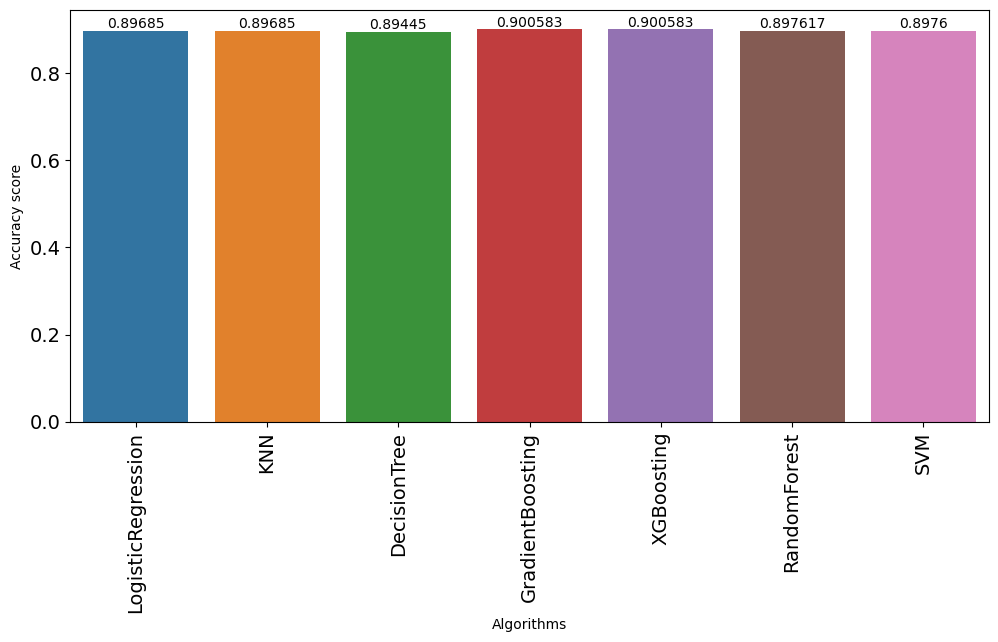

In [125]:
plt.figure(figsize=(10,6))
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")
ax=sns.barplot(x=algorithms,y=scores)
for label in ax.containers:
    ax.bar_label(label)
    plt.xticks(rotation=90)
plt.tight_layout()
plt.tick_params(labelsize=14)

# Conclusion:

# Challenges Faced:

# Techniques used for customer transaction Prediction:

# Conclusion: